# Exploring Unfairness in Data

## Learning Objectives
* Understanding and Applying Linear Regression 
* Data Exploration
* Practice ML Workflow: Training, Testing, and Evaluation

## Credits
This assignment was published at the Symposium on Educational Advances in Artificial Intelligence, 2020, and slightly modified to suit this course.

[Chen, Larsen and Neumann, Exploring Unfairness and Bias in Data, EAAI 2020](http://modelai.gettysburg.edu/2020/bias/)

## Outline

1. [Unfairness](#1.-Unfairness)
2. [Exploring Loan Approval Data](#2.-Exploring-Loan-Approval-Data)
3. [Building a Model](#3.-Building-a-Model)
4. [Becoming Data and Fairness Aware](#4.-Becoming-Data-and-Fairness-Aware)

## 1. Unfairness

It is natural to assume that a model built from "real-world" data will inherently represent the world at large. We often take the data that we have for granted, especially when we are first getting started with building AI systems. However, if we do not pay attention to what our data look like, how they were collected, and what features they contain, we may unknowingly create models that propagate cultural biases and unfairness.

![hire](utility/images/undraw_hire_te5y.png)

In 2014, Amazon began building programs that could automate the hiring process for engineers. They wanted a machine to be able to pick out the top resumes from the thousands they receive every year. They trained their model on all of the resumes that they had, hoping that the model would be able to identify trends in keyword frequency within those applications. If most applications contained the word "intern," then one might reasonably expect that a resume containing it would be ranked higher than one that doesn't. However, as they began to deploy their model, it became increasingly apparent that the model was discriminating against women. When engineers investigated why this was the case, they found that the data they trained the model with, the resumes, had mostly come from men. The model had learned to prefer resumes that didn't contain the word "women's" because that word wasn't frequent seen during its training. Although gender was not explicitly a feature of the dataset, it was still present in the dataset, encoded within the experiences that applicants reported. 

Amazon's case serves as a reminder that we must be careful of our data, even more so today as data becomes cheaper to collect.

## 2. Exploring Loan Approval Data

Imagine that you are a data scientist at a bank and that one of your company's primary business areas is in lending money. The current loan approval process, that has been in place since the founding of the bank, has always relied on manual review of applications -- a process that is tedious and doesn't scale well in the modern age. The company wants to expand their business, but this archaic system is holding them back.

Think about how to approach this problem. You likely immediately thought of using the bank's past loan approval records to build a model that can learn how a human application reviewer decides which applications to approve and which to reject.

![approval](utility/images/undraw_accept_request_vdsd.png)

### Acquiring the Data



Before we begin, let's make sure that we have the data. The cell below checks if you have the `loan-payments.csv` file in the `utility/data` directory.

Next, let's load our data. In the cell below, we read our [CSV][1] file into a [Pandas][2] [`DataFrame`][3] called `data`.

[1]: https://en.wikipedia.org/wiki/Comma-separated_values
[2]: https://pandas.pydata.org/
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [1]:
from os.path import exists


data_dir = 'utility/data'

assert exists(f'{data_dir}/loan-payments.csv'), 'Loan data file is missing.'

In [2]:
!pip3 install pandas
import pandas as pd

data = pd.read_csv(f'{data_dir}/loan-payments.csv')

Defaulting to user installation because normal site-packages is not writeable


Let's take a look at what we have.

In [3]:
data

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bachelors,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bachelors,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,College,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,College,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,College,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,College,female


**Write-up!** How many examples are in our data set? How many features does it have? **[2 pts]**

There are 500 examples and 11 features in our data set.

**Write-up!** Come up with a short description of what you think each feature is and what type of feature each one is. Which column should be our target variable? Which ones do you think will be useful for our model? **[5 pts]**

Feature Descriptions & Classifications

1. loan_id is a cateogorical variable that represents the id number of the loan so it can be tracked.
2. loan_status(target variable) is a cateogorical variable that represents the status of the loan, whether it has been paid or not
3. principal is a numerical variable that represents the initial amount of the loan.
4. terms is a numerical variable that represents the terms of the loan(days given).
5. effective_date is a date/time variable that represents the date/time the loan was assigned.
6. due_date is a date/time variable that represents the date/time the loan should be paid by.
7. paid_off_time is a date/time variable that represents the date/time the loan was paid. 
8. past_due_days is a numerical variable that represents the number of days the loan has been past due.
9. age is a numerical variable that represents the age of the person taking the loan.
10. education is a categorical variable that represents the highest level of education completed by the person taking the loan. 
11. gender is a categorical variable that represents the gender of the person taking the loan.

The target variable here is loan_status because it indicates whether the loan was paid or not which is what we're trying to 
predict using the other variables.

Some helpful features include past_due_days, terms, and due_date to assess whether the loan was paid or not and the variables 
age, education, and gender can be used as well to understand more about the individual who has to pay off the loan like their 
circumstances which contribute to the likeliness of the loan being paid off or not.

### Making Some Adjustments

Now let's drop the columns in `data` that contain features that we are not interested in. Since `loan_id`s are not informative for predicting new loans, we can ignore them. Additionally, `effective_date`, `due_date`, and `paid_time_off` are all encoded in `past_due_days`. It is unlikely that the specifics of when a loan was due is predictive of success.

In [4]:
not_interested = ['loan_id', 'effective_date', 'due_date', 'paid_off_time']

data = data.drop(not_interested, axis=1)

Let's see our new data set.

In [5]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bachelors,female
2,PAIDOFF,1000,30,NaN,33,Bachelors,female
3,PAIDOFF,1000,15,NaN,27,College,male
4,PAIDOFF,1000,30,NaN,28,College,female


Did you notice that `past_due_days` has `NaN` values?

**Write-up!** Why might some of the values in `past_due_days` be `NaN`?  What should we do about this? **[3 pts]**

Some of the values in past_due_days are NaN because the loan must have been paid off by the due date so there were no days past due. We 
can replace the NaN values with a value like 0 to indicate that there were no past_due_days since the loan was paid by the deadline.


Replace the values in `past_due_days` with a reasonable value. `HINT` you can use the `fillna` function on `DataFrame`s to do this. **[2 pts]**

In [6]:
data["past_due_days"].fillna(0, inplace=True)

Let's see if it worked.

In [7]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


Nice!

### Visualizing the Data Set

Now that we have narrowed down the features we want to use, let's visualize them.

For each feature, in the corresponding cell below, create a plot that we can use to understand the values of that feature. These plots should be appropriate for the type of each feature (e.g. use a bar plot for categorical features). Ensure that you have all the components of a nice plot, making sure to include things like axes labels, a legend, and a title. In the `raw` cell below each code cell, describing what you see. **[24 pts]**

In [8]:
import matplotlib.pyplot as plt

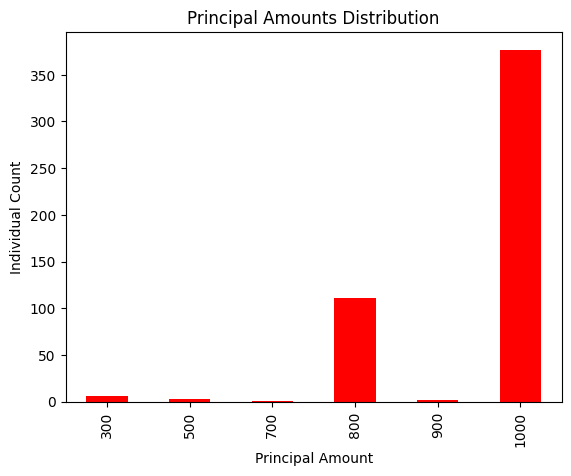

In [9]:
# Plot values of Principal
data['principal'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Principal Amounts Distribution')
plt.xlabel('Principal Amount')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Principal
The plot for Principal Amounts represents the number of individuals who have loans with those principal amounts. Individuals tend to take 
out loans that are 1000 dollars and occasionally loans that are 800 dollars. This is important cause we can used the size of the amount 
to draw conclusions on how fast the loan is paid off and if the loan will be paid off in time.

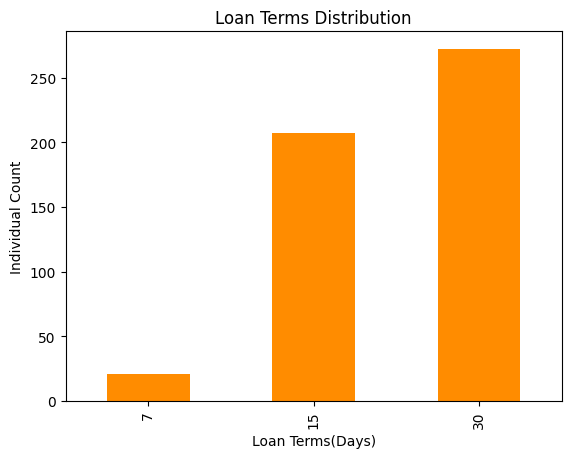

In [10]:
# Plot values of Terms
data['terms'].value_counts().sort_index().plot(kind='bar', color='darkorange')
plt.title('Loan Terms Distribution')
plt.xlabel('Loan Terms(Days)')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Terms
The plot for Terms represents the number of individuals who have loans with different term durations in days. This bar plot shows that 
individuals tend to have terms around 15 or 30 days which can help us understand how the term duration correlates to whether the loan 
is paid off on time or not. This helps us understand whether the loan is easy or hard to pay off and in correlation how likely it is 
to be paid off in time.

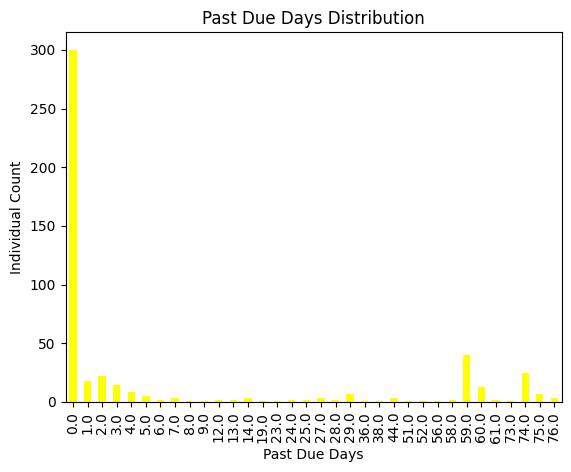

In [11]:
# Plot values of Past Due Days

data['past_due_days'].value_counts().sort_index().plot(kind='bar', color='Yellow')
plt.title('Past Due Days Distribution')
plt.xlabel('Past Due Days')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Past Due Days
The plot for Past Due Days represents the number of individuals who pay their loans on or after the due date and determines how many late 
days they took before paying the loan. This bar plot shows that individuals tend to pay their loans on time with 0 Past Due Days. Some 
individuals take up to a week or around 2 months of Past Due Days before paying their loans which helps us understand the norms of 
paying off loans on time. This helps us understand how long the borrower is taking in addition to the days given to them already.

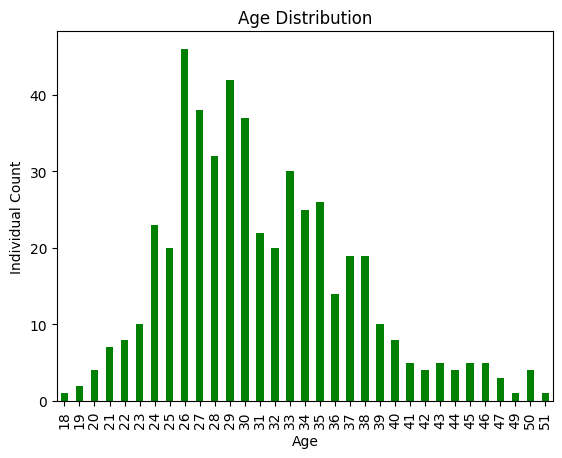

In [12]:
# Plot values of Age

data['age'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Age
The plot for Age Distribution represents the age of the individuals who have loans that they need to pay off. This bar plot shows that 
individuals between the ages of 24 and 38 tend to take out loans more often than individuals between the age ranges of 18 to 23 and 39 
to 51 probably due to paying off their college tuition or house loans. This helps us understand how responsible the borrower is to 
help us predict whether the loan will be paid off on time or not.

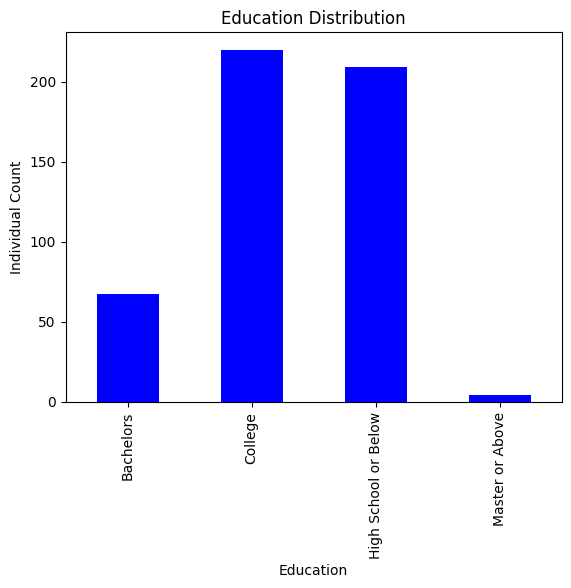

In [13]:
# Plot values of Education

data['education'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Education
The plot for Education Distribution represents the highest education finished of the individuals who have loans that they need to pay off.
This bar plot shows that individuals who have completed high school or below and college have taken out more loans often than individuals 
who have finished their bachelor's or master's degrees. This suggests that the incomes of college grads without degrees and high school 
or below might not be enough to pay off bills quickly so they take loans more often.

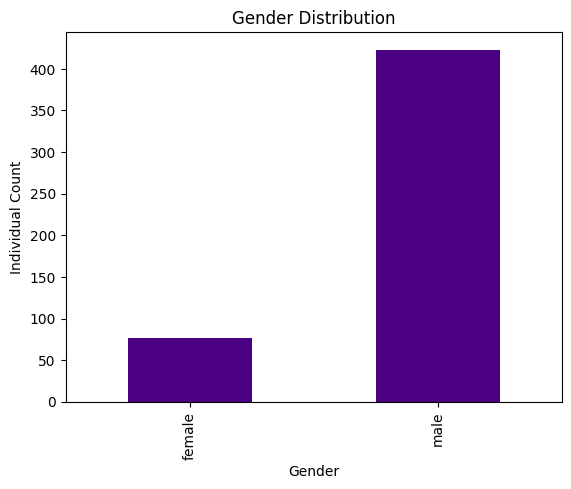

In [14]:
# Plot values of Gender

data['gender'].value_counts().sort_index().plot(kind='bar', color='indigo')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Individual Count')
plt.show()

# Describe the plot for Gender
The plot for Gender Distribution represents the gender of the individuals who have loans that they need to pay off. This bar plot shows 
that individuals who are male-representing tend to have taken out more loans than the female-representing individuals. This suggests that 
men take out more loans than women due to the fact that they may be in charge of more monetary issues of higher values like buying a 
house or market shares. 

## 3. Building a Model

Now that we have a sense for the nuances of our dataset we can try building some models.

![analytics](utility/images/undraw_predictive_analytics_kf9n.png)

Before we continue, we will need to encode our categorical features with enumerations instead of the string values that they currently have. As a reminder, this is what our dataset looks like right now.

In [15]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


An easy way to do this encoding is to use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`. In the cell below, we create a list called `categorical` containing the names of the columns corresponding to the categorical features in our dataset. We then create and instance of a `LabelEncoder` and use it to transform the categorical features.

In [16]:
%pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

categorical = ['loan_status', 'education', 'gender']

# create an instance of a LabelEncoder
encoder = LabelEncoder()

# make a copy of our data
encoded = data.copy()

# apply the encoder's `fit_transform` method to the values for each categorical
# feature column
encoded[categorical] = data[categorical].apply(encoder.fit_transform)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Let's take a look at the results.

In [17]:
encoded

,loan_status,principal,terms,past_due_days,age,education,gender
0,2,1000,30,0.0,45,2,1
1,2,1000,30,0.0,50,0,0
2,2,1000,30,0.0,33,0,0
3,2,1000,15,0.0,27,1,1
4,2,1000,30,0.0,28,1,0
...,...,...,...,...,...,...,...
495,1,1000,30,3.0,28,2,1
496,1,1000,15,14.0,26,2,1
497,1,800,15,3.0,30,1,1
498,1,1000,30,1.0,38,1,0


Notice how the categorical values like "PAIDOFF" have now been replaced with numbers. We can see which numbers map to each value like this:

In [18]:
for column in categorical:
    print(*sorted(zip(encoded[column].unique(), data[column].unique()), key=lambda x: x[0]))

(0, 'COLLECTION') (1, 'COLLECTION_PAIDOFF') (2, 'PAIDOFF')
(0, 'Bachelors') (1, 'College') (2, 'High School or Below') (3, 'Master or Above')
(0, 'female') (1, 'male')


Next let's separate our features from our target variable, `loan_status`.

In [19]:
X, y = encoded.loc[:, encoded.columns != 'loan_status'], encoded.loan_status

### Establishing a Baseline

Now we're ready to start building models. First, let's create a train/test split of our data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

Then, let's train and evaluate a LogisticRegression model.

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**Try this!** In the cell below, evaluate the model's performance on the testing set using 2 different metrics. **[4 pts]**

In [22]:
# your code here
from sklearn.metrics import precision_score, recall_score

#holds the predictions on testing set
y_pred = model.predict(X_test)

# precision score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

#

Precision: 0.9711
Recall: 0.9700


**Write-up!** How does our model perform on the test set? Explain your answer in terms of the metrics you chose to evaluate performance. **[2 pts]**

The model performs extremely well on the test set with a precision score of 0.9711 and a recall score of 0.9700. The precision score of 
0.9711 indicates that the model correctly classifies 97.11% of the images in a certain class which is a very high precision rate. The 
recall score of 0.9700 suggests that the model correctly identified 97.00% of the images in a certain class. Overall, this model is very 
accurate with its predictions because of the high precision and recall scores.

Let's also try looking at the model's performance on test examples of different genders.

In [23]:
print(f'''
validation (men) score: {model.score(X_test[X_test['gender'] == 1], y_test[X_test['gender'] == 1]):0.3f}
validation (women) score: {model.score(X_test[X_test['gender'] == 0], y_test[X_test['gender'] == 0]):0.3f}
''')


validation (men) score: 0.988
validation (women) score: 0.889



Yikes!

**Write-up!** What do you notice about these scores? How does these compare with the initial score we saw for the entire test set? What does this imply about our model? **[4 pts]**

The model has a disparity among the accuracy rates in predicting test examples of different genders. The male gender test examples have a 
high accuracy of 98.8% for the model which is fairly close to our precision and recall scores but the female gender test examples have an 
accuracy of 88.9% which is significantly lower than the precision and recall scores for the entire test set. This implies that our model 
has very different accuracies based on the test examples provided and has an implicit bias for the male gender over the female gender.

### Dropping Gender

So our model is biased with respect to gender and gender is a feature of the model. Would it help to ignore the gender feature during training? Let's try it out.

Let's start by creating another train/test split, but this time using a copy of `X` and `y` that don't include `gender`.

In [27]:
    X_without_gender = X.drop(['gender'], axis=1)

    X_train, X_test, y_train, y_test = \
        train_test_split(X_without_gender, y, test_size=0.2, stratify=y, random_state=3)

Let's see what `X_train` looks like now.

In [28]:
X_train.head()

,principal,terms,past_due_days,age,education
215,1000,30,0.0,29,1
196,1000,30,0.0,29,1
118,1000,30,0.0,35,0
432,800,7,2.0,34,0
496,1000,15,14.0,26,2


Now let's repeat our procedure for our baseline experiment.

In [26]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

print(f'''

validation score: {model.score(X_test, y_test)}
validation (men) score: {model.score(X_test[X.iloc[X_test.index]['gender'] == 1],
                                     y_test[X.iloc[X_test.index]['gender'] == 1]):0.3f}
validation (women) score: {model.score(X_test[X.iloc[X_test.index]['gender'] == 0],
                                       y_test[X.iloc[X_test.index]['gender'] == 0]):0.3f}
''')



validation score: 0.97
validation (men) score: 0.988
validation (women) score: 0.889



The results are the same?

**Write-up!** What might this imply about our model and our data? Why may it not be a good idea to ignore "protected variables" like "gender" when training a model. Record your response below. **[4 pts]**

The results being the same regardless of the gender column being dropped suggests that the model may have been trained by the other 
column variables to pick up gender-related data patterns. So, the model will have this bias regardless of us dropping the gender 
variable column. Ignoring protected variables like gender is not a good idea because the training will not be able to analyze 
certain biases the model has and will not be able to strategize based on that. Therefore, it's always important to address a 
model's biases to understand the model's accuracy.

## 4. Becoming Data and Fairness Aware

![team](utility/images/undraw_team_spirit_hrr4.png)

The goal of this exercise was to demonstrate how an accuracy score can mislead you into thinking that your model is great and that your mission has been accomplished. By digging only a little bit deeper and evaluating our model's performance on each gender separately, we found that it performed very differently between genders. It was biased!

Just like that, while we were building a model to predict creditworthiness and loan repayment, we ran into the same problem Amazon did with their resume reviewing algorithm. Because the data we used was imbalanced, we introduced bias into our model unintentionally.

If you search online, you will find a myriad of ways that could be used to mitigate the effects of an imbalanced dataset. However, at the end of the day, the **best solution for both Amazon and us is to collect more complete data**.

We have only barely scratched the surface of fairness in Data Science. The field is both complex and emerging. If you are looking for more information about, I recommend starting with [Google's overview](https://developers.google.com/machine-learning/fairness-overview/) of the topic. The [AI Ethics Intro course by Kaggle](https://www.kaggle.com/learn/intro-to-ai-ethics) is another fantastic introductory resource, with more hands-on exercises such as this one. This [PAIR Explorable](https://pair.withgoogle.com/explorables/hidden-bias/) (to be covered in lecture on Nov 28th) offers a visual insight into hidden biases.